In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy.stats import iqr
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
import random

# Chapter 1 : Exploratory Data Analysis
The Exploratory Data Analysis is a first step of a data-driven project. It involves:
* Getting familiar with the data
    * Identified the structures of the data (categorical or numerical variable)
    * Estimate typical values for each feature
    * Exploring the data distribution
* Identifying patterns
    * Correlation between data

This allows to:
* Spot anomalies
* Selecting futur models and tools

### Elements of Structured Data 

The two main structured data types are numeric and categorical. The numerical variables provide quantitative information on which statistics can be applied. Categorical variables provide more qualitative information and allow to group the data.  Let's see what kind of data we are dealing with:

In [3]:
df = pd.read_table("data_stroke.csv",sep=",",header=0)
print(f'data types : \n {df.dtypes}')

data types : 
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


The data type of a variable in a DataFrame can often give a hint about whether a variable might be numeric or categorical:
* Numeric : int or float
* Categorical : object or category


Based on that we can class the different variables:

 * **Categorical variables** : <br>
 gender : "Male", "Female" or "Other"  <br>
 ever_married :  "No" or "Yes" <br>
 work_type :  "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
 Residence_type :  "Rural" or "Urban"  <br>
 smoking status :  "formerly smoked", "never smoked", "smokes" or "Unknown" <br>
 
 
 * **Numerical variables** : <br> 
 age : age of the patient <br>
avg_glucose_level  <br>
bmi :  body mass index   <br>
heart_disease :  0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br>
 hypertension : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
 stroke : 1 if the patient had a stroke or 0 if not <br> 


 ### Estimates of Location and variability
 
 #### Location
 Numeric variables take various values. It exists simple metrics giving a representative value of an ensemble of values:
- Mean
    * sum of the values divided by the number of values
    * sensitive to outliers
- Pth percentile
    * value such as P percent of the data are less or equal to this value 
    * equivalent to quantile
- Median
    * value such as 50 percent of the data are less or equal to this value 
    * 50th percentile
    * robust to outliers

#### Variability
The variabily or dispersion estimates how centered around a certain value (or spread out) the data are. Here the metrics I will use:
- deviation
    * difference between a value and a metric (mean, median etc)
- mean/median absolute deviation (mad)
    * average of the absolute values of the deviations from the mean or median
    * give an idea of how dispersed from their mean/median a set of values are
- variance 
    * average of the squared values of the deviations from the mean
- standard deviation (std)
    * square root of the variance
    * same unit as the origin data (square root of a squared value)
    * sensitive to outliers
- interquartile range (iqr)
    * difference between the 75th (q3) and 25th (q1) percentiles of the data
    * use to define outliers as values below the q1 - iqr and above q3 + iqr
    * robust to outliers


A quick way to estimate location and variability from a dataframe is to use the "describe" function:

In [4]:
df[["age","bmi","avg_glucose_level"]].describe()

,age,bmi,avg_glucose_level
count,5110.000000,4909.000000,5110.000000
mean,43.226614,28.893237,106.147677
std,22.612647,7.854067,45.283560
min,0.080000,10.300000,55.120000
25%,25.000000,23.500000,77.245000
50%,45.000000,28.100000,91.885000
75%,61.000000,33.100000,114.090000
max,82.000000,97.600000,271.740000


### Missing Values
Check for and handle missing values as it is crucial to ensure the quality and accuracy. Missing data can arise due to various reasons—such as errors in data collection,or processing—and can significantly impact the outcomes of statistical tests and predictive models if not properly addressed. Strategies for handling missing values include:

* Removing Data
    *   Delete rows with missing values if they are few. This approach is simple and can be effective but may lead to a loss of valuable information.
* Imputation
    * Fill in missing values with an estimated value based on other available data. Common methods include using the mean, median, or mode of the column.
    
Let's check:

In [11]:
# Display NaN counts per column in 'df'.
print(df.isnull().sum(axis=0))
# Drop rows with NaNs in 'df', save to 'df_cleaned'.
df_cleaned = df.dropna()
# Write 'df_cleaned' to a CSV, excluding the index.
df_cleaned.to_csv('cleaned_data.csv', index=False)


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### Exploring the Data Distribution

To explore the data distribution, we can also use the statistical graphics such as:
- boxplot
    * use percentiles to represent the spread of data
- violin
    * similar to a boxplot but smoothed by a density function to a better visualisation
- one-way frequency table
    * count of values belonging to an interval or a category
- histogram
    * plot of a frequency table
- density plot
    * smoothed version of a histogram (similar to what the violin is for the boxplot)


Let's use the different statistical representations to the distribution of the age:


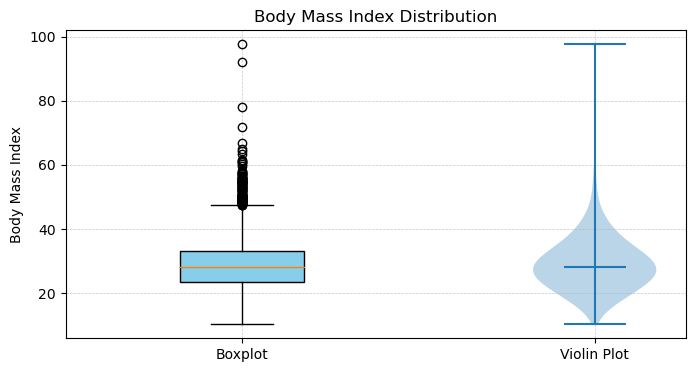

In [12]:
bmi = df_cleaned['bmi']

# Create the plot
plt.figure(figsize=(8, 4))
plt.boxplot(bmi, positions=[1], widths=0.35, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.violinplot(bmi, positions=[2], showmedians=True, widths=0.35, bw_method=0.5)

plt.ylabel('Body Mass Index')
plt.xticks([1, 2], ['Boxplot', 'Violin Plot'])
plt.title('Body Mass Index Distribution')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


The line within the box indicates the median age, which is the middle value of the data.
The bottom and top of the box represent the first (Q1) and third (Q3) quartiles, indicating that 50% of the data falls within this range (which is the interquartile range, IQR).
The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the quartiles, except for outliers. The points below the lower whisker are considered outliers, indicating ages that are unusually low compared to the rest of the dataset.

The violin plot combines the boxplot with a kernel density estimation, which shows the probability density of the data at different values.
The width of the shaded area at different ages indicates the frequency of the data : wider sections represent a higher occurrence of data points at that age.

From the violin plot, it appears the age distribution is fairly symmetric about the median. However, the presence of outliers in the boxplot suggests that there are  individuals who are significantly heavier than the main group.


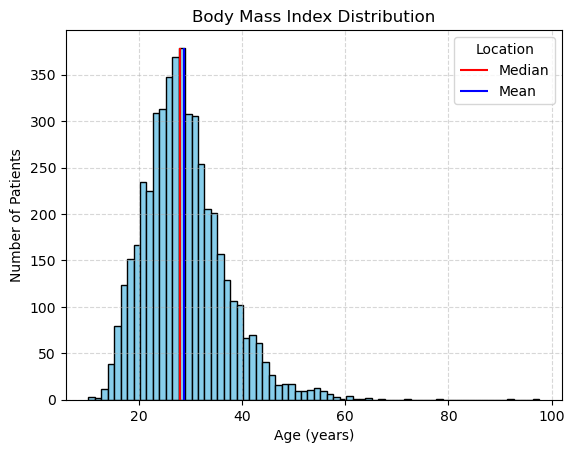

In [15]:

num_bins = int(np.sqrt(len(df_cleaned['bmi'])))

n,bins,_ = plt.hist(df_cleaned["bmi"], bins=num_bins, color='skyblue', edgecolor='black')
plt.xlabel('Age (years)')
plt.vlines(df_cleaned["bmi"].median(),0,np.max(n),color="red",label="Median")
plt.vlines(df_cleaned["bmi"].mean(),0,np.max(n),color="blue",label="Mean")
plt.legend(title="Location")
plt.ylabel('Number of Patients')
plt.title('Body Mass Index Distribution')
plt.grid(True, linestyle='--', alpha=0.5)

The histograms hilights what has been observed in the violin plot, a distribution nearly symetric centred around the median and skewed to the higher bmi. The mean is fearly close to the median - slightly higher - due to the presence of outliers.

### Exploring Binary and Categorical Data

In general, we can't apply the metrics we used for numerical variables, for categorical variables. However it exists some statistical tools we can use to get insights:
- Mode
    * most common value or category
- Expected value
    * can be considered as the total value we can expect from a categorial variable
    * multiply each value of the categorical by its occurence (or probability) and sum all the values.
- Bar chart
    * represent categories of a categorical variable with rectangular bars whose the lenght is proportional <br> to the value they represent. It can be frequency or not.
- Pie chart
    * similar to bar chart at the difference the rectangular bars are replaced by arc lenght

Let's try to apply these statistics on the dataset:

The mode refers to the most frequently common value in a dataset:

In [8]:
# Print the work type with the highest number of patients
print(f"The work type with the highest number of patients is {df_cleaned['work_type'].mode()[0]}.")

The work type with the highest number of patients is Private.


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


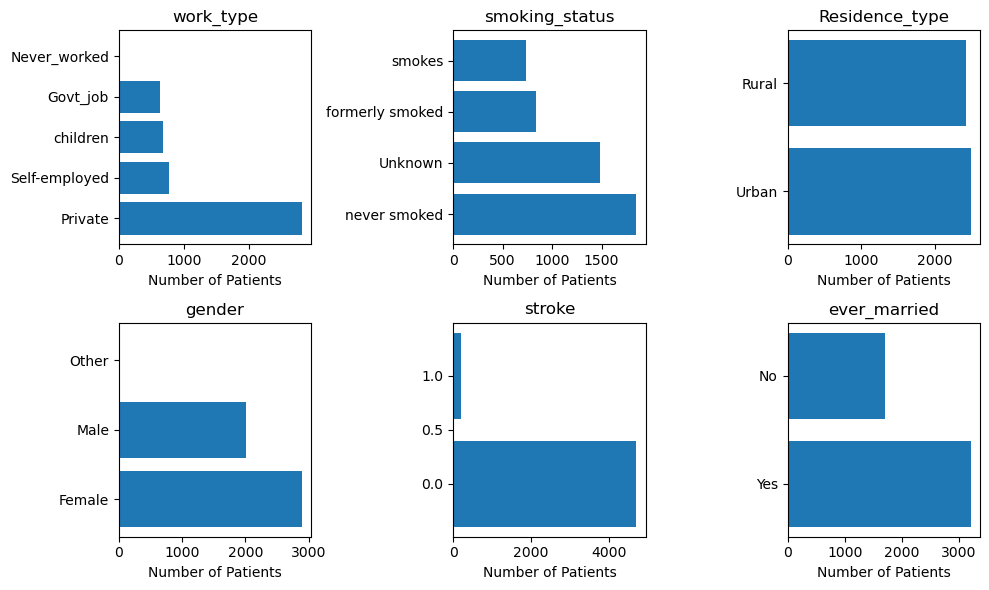

In [10]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(10,6))


def display_barh(variable_name,axis_name):
    # Count the occurrences 
    counts = df_cleaned[variable_name].value_counts()
    axis_name.barh(counts.index, counts.values)
    axis_name.set_xlabel("Number of Patients")
    axis_name.set_title(variable_name)  # Corrected the title to match the data
    return

display_barh('work_type',ax1)
display_barh('smoking_status',ax2)
display_barh('Residence_type',ax3)
display_barh('gender',ax4)
display_barh('stroke',ax5)
display_barh('ever_married',ax6)

fig.tight_layout()
plt.show()


It appears that the categories "Other" under "gender" and "Never_worked" under "work_type" have very few entries compared to other categories of the same variable. I consider that these categories are not critical, and the sample size is too small to be informative or to generalize from, so I will remove it. On the other hand, althought  "1" from stroke variable is significantly smaller than the "0", this category is of importantce because stroke is the target variable.

In [11]:
df_cleaned.loc[((df_cleaned["gender"]== "Other")&(df_cleaned["stroke"]==1))
               | ((df_cleaned["work_type"]== "Never_worked")&(df_cleaned["stroke"]==1))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [12]:
# Drop records where 'stroke' column has value equal to value_to_filter
df_cleaned= df_cleaned.drop(df_cleaned[(df_cleaned['work_type'] == "Never_worked") 
                                          | (df_cleaned['gender'] == "Other")].index)
df_cleaned.to_csv('cleaned_data.csv', index=False)

df_cleaned.groupby("gender").count()


,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2886,2886,2886,2886,2886,2886,2886,2886,2886,2886,2886
Male,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


### Correlation

Correlation is a part of data analysis that looks into relationship between data. One of the main tools is:
- Correlation coefficient, r
    * measures the strenght and direction of a linear relationship
    * r is between -1 (negative correlation) and +1 (positive correlation )
    * sensitive to outliers
- Correlation matrix
    * table with variables as rows and columns, and whose each cell give a correlation coefficient
- Scatter plot
    * With two variables X = [x1,x2,...,xn] and Y = [y1,y2,...,n], the scatter plot represents the position of each paire (xi,yi) with dots.
- p-value (scatter plot context)
    * give the probability that randomly drawn dots will give equivalent relationship 


To compute correlation coefficients, it's essential to focus on numerical features since correlation calculations typically involve these types of data. 
Here are the features I will consider:

* age: A continuous variable representing the age of the patients.
* hypertension: Although binary (0 or 1), it can be treated as numeric for correlation analysis.
* heart_disease: Also binary, similar to hypertension, useful for checking correlations.
* avg_glucose_level: A continuous variable indicating the average glucose level in the blood.
* bmi: Body Mass Index, a continuous variable providing a measure of body fat based on height and weight.

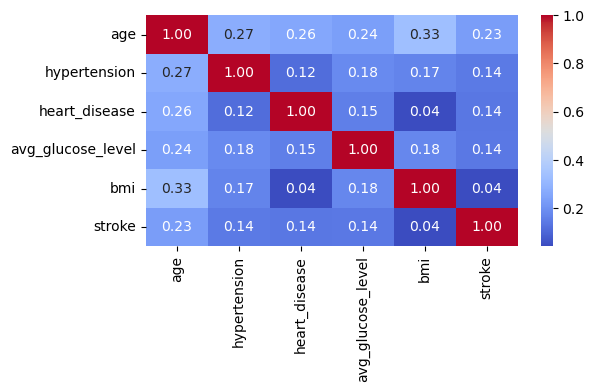

In [19]:



# Selecting numerical columns for correlation
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df_correlation = df_cleaned[numerical_cols]

correlation_matrix = df_correlation.corr()

plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


The variable age seems to correlate positively with the other variables, although the correlation is weak. 

### Exploring two and more variables

Here, I will extend some tools we used for exploring one variable to two and more variables:
- Contingency table
    * extension of the one-way frequency table
- box plot or violin plot

In [14]:
pd.crosstab(df_cleaned["work_type"], df_cleaned["stroke"], rownames=['work_type'], 
                              colnames=['stroke'], normalize='index')


stroke,0,1
work_type,,
Govt_job,0.955556,0.044444
Private,0.954804,0.045196
Self-employed,0.931613,0.068387
children,0.998510,0.001490


Each cell contains the proportion of patients had a stroke or not in a particular work type (row). We can see that people self-employed seems to present the highest proportion of stroke.

<Axes: xlabel='bmi', ylabel='smoking_status'>

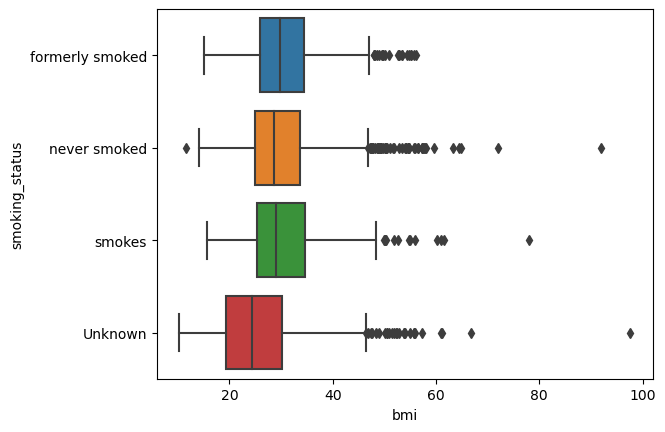

In [15]:
sns.boxplot(y=df_cleaned["smoking_status"], x=df_cleaned["bmi"]) 

The bar chart illustrates the age distribution of patients across work type. The length of each bar corresponds to the age range of patient. Work type with wider bars represent a broader age range of patients.